In [98]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [99]:
# to read in all the words
words=open('names.txt', 'r').read().splitlines()
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [100]:
len(words)

32033

In [101]:
# to build a vocabulory of charecters to/from integers like string to integer and vise versa
chars=sorted(list(set(''.join(words))))
stoi={s:i+1 for i,s in enumerate (chars)}
stoi['.']=0
itos={i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [102]:
# To build the dataset

block_size = 3 # it is the context length of how many charecters do we take to predict the next one ?
X ,Y  =[],[] # X are the input to the neuralnet and Y are the lables for each inside X
for w in words: # first using only five words for efficiency then will change  it to use all the words
    # print (w)
    context=[0] *block_size   # Start with zero-padding
    for ch in w +'.':          # Adding '.' as an end token
        ix=stoi[ch]             # Convert character to its index using stoi
        X.append(context)
        Y.append(ix)
        # print(''.join (itos[i] for i in context), '----->', itos[ix])
        context=context[1:]+[ix] #context[1:] removes the first element (shifts left). #[ix] appends the new character index. #This maintains the sliding window of block_size.

X= torch.tensor(X) # converting the list into tensor values
Y= torch.tensor(Y)


In [103]:
X.shape , X.dtype , Y.shape , Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [104]:
X


tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        ...,
        [26, 26, 25],
        [26, 25, 26],
        [25, 26, 24]])

In [105]:
# Now let us build a neural network which predict the value Y using th value X

In [106]:
# we have 27 posible charecters  in which we are going to emmbed them in a lower dimentional space
C=torch.randn(27,2) # To generate random values for 27 charecters in an two dimentional space
C

tensor([[ 0.6739,  0.6960],
        [ 0.5907, -0.2160],
        [ 1.4015, -0.2704],
        [ 0.1413,  1.4867],
        [-0.1024, -0.9254],
        [ 0.5706,  1.2969],
        [ 0.9792, -1.1017],
        [-1.3454,  0.8231],
        [-0.9259, -0.0415],
        [ 0.4062, -0.2040],
        [ 0.0513,  1.4476],
        [ 1.0325, -0.2394],
        [-0.1342, -1.3288],
        [-2.4077,  0.7372],
        [-0.2235, -0.1079],
        [-1.0573, -1.8232],
        [-0.0663, -0.4303],
        [ 1.6929, -0.4876],
        [ 0.0142, -1.4176],
        [-0.8669, -0.9028],
        [ 0.0253, -0.2741],
        [-0.8145,  0.1990],
        [-0.4352,  0.0723],
        [-0.5995,  0.2838],
        [-1.6261, -0.5408],
        [-1.5172,  0.5332],
        [ 1.2456,  0.5238]])

In [107]:
#F.one_hot(torch.tensor(5), num_classes=27).float() @ C  # converting into a one_hot format where the value place will be zero

In [108]:
# Emmedding using pytorch indexing
emb = C[X]
emb


tensor([[[ 0.6739,  0.6960],
         [ 0.6739,  0.6960],
         [ 0.6739,  0.6960]],

        [[ 0.6739,  0.6960],
         [ 0.6739,  0.6960],
         [ 0.5706,  1.2969]],

        [[ 0.6739,  0.6960],
         [ 0.5706,  1.2969],
         [-2.4077,  0.7372]],

        ...,

        [[ 1.2456,  0.5238],
         [ 1.2456,  0.5238],
         [-1.5172,  0.5332]],

        [[ 1.2456,  0.5238],
         [-1.5172,  0.5332],
         [ 1.2456,  0.5238]],

        [[-1.5172,  0.5332],
         [ 1.2456,  0.5238],
         [-1.6261, -0.5408]]])

In [109]:
W1 =torch.randn(6,100)# The number of inputs are 6 as its 2 dimentional emmedings and there are 3 as block size and we take no of neurons in the hidden layer as 100 for example
b1= torch.randn(100)


In [110]:
# emb @ W+ b this is what we want to do basically but we have a problem because those tensors are of different shape so we have to turn the [32 , 3 , 2] into [32 , 6] in order to perform this multiplication

In [111]:
#torch.cat([emb[:,0,:], emb[:,1,:], emb[:,2,:]],1) .shape# used to concatenate those three tensors as 32,6 across dimention 1
#but we wont use this code as we manually entered those values as 3 and we have to use another function in pytorch called unbind which does automatically

In [112]:
#torch.cat(torch.unbind(emb,1),1).shape # This unbind function concatenates the emb accross  dimention 1
# But this is inefficient and creates all kind of new memory so we are using .view to manipulate it to concatenate the tensors

In [113]:
h=torch.tanh(emb.view(-1,6) @ W1 + b1) # here we use view to concatenate as we give -1 so the pytorch automatically assumes it as 32 or any other values and to0 calculate h we have to use tanh

In [114]:
h.shape # the sixe is 32, 100 because ther are 32 examples going  to 100 neurons in the hidden layer 

torch.Size([228146, 100])

In [115]:
# now we have to do the final layer 
W2 =torch.randn((100,27))
b2 =torch.randn(27)

In [116]:
logits= h @ W2 +b2 # Then we have to perform the same as makemore 1 do the calculation and find exponential and find the probability and normalize it

In [117]:
logits.shape

torch.Size([228146, 27])

In [118]:
counts=logits.exp()

In [119]:
prob=counts / counts.sum(1,keepdims=True)

In [121]:
# loss=-prob[torch.arange(32),Y].log().mean() # this is the loss of the network to predic the next charecter
# loss

In [122]:
# ---------------clear view--------------------#

In [123]:
g = torch. Generator().manual_seed (2147483647) # for reproducibility
C = torch.randn((27, 2), generator=g)
W1 =torch. randn((6, 100), generator=g)
b1 =torch.randn (100, generator=g)
W2 =torch. randn((100, 27), generator=g)
b2 =torch.randn (27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [124]:
sum(p.nelement() for p in parameters) # number of parameters in total

3481

In [125]:
for p in parameters:
    p.requires_grad=True

In [126]:
for _ in range  (10):
    #Forward Pass
    emb = C[X] # (32, 3, 2)
    h = torch.tanh (emb.view(-1, 6) @ W1 + b1) # (32, 100)
    logits =h@ W2 + b2 # (32, 27)
    #counts = logits.exp()
    # prob = counts / counts.sum (1, keepdims=True)
    # loss = -prob [torch.arange(32), Y].log() .mean()
    loss=F.cross_entropy (logits, Y) # using cross entropy because it wont create more tensors like previous method
    print(loss.item())

    #Backward Pass
    for p in parameters:
        p.grad=None
    loss.backward()

    #update
    for p in parameters:
        p.data+= -0.1 *p.grad
# print(loss.item())

19.505229949951172
17.08448600769043
15.776531219482422
14.833340644836426
14.002605438232422
13.253262519836426
12.57991886138916
11.983102798461914
11.470495223999023
11.05185604095459


In [127]:
# The above process may take a lot of time because of large no of example in practically people create it as some mini batches and run it

In [128]:
lre =torch.linspace(-3, 0 , 1000)
lrs =10**lre

In [135]:
lri=[]
lossi=[]

for i in range  (10000):

    #Constructing a mini batch
    ix= torch.randint(0,X.shape[0],(32,))

    #Forward Pass
    emb = C[X[ix]] # (32, 3, 2)
    h = torch.tanh (emb.view(-1, 6) @ W1 + b1) # (32, 100)
    logits =h@ W2 + b2 # (32, 27)
    #counts = logits.exp()
    # prob = counts / counts.sum (1, keepdims=True)
    # loss = -prob [torch.arange(32), Y].log() .mean()
    loss=F.cross_entropy (logits, Y[ix]) # using cross entropy because it wont create more tensors like previous method
    print(loss.item())

    #Backward Pass
    for p in parameters:
        p.grad=None
    loss.backward()

    #update
    lr=lrs[i]
    for p in parameters:
        p.data+= -lr *p.grad

    # Track Stats
    lri.append(lre[i])
    lossi.append(loss.item())
# print(loss.item())

7.919906139373779
5.757904052734375
7.139232158660889
6.476595878601074
7.503355026245117
5.329115390777588
7.3496994972229
7.438697814941406
7.102537155151367
6.81482458114624
5.70053243637085
7.305115699768066
6.754862308502197
6.685000896453857
7.3730316162109375
6.457335472106934
5.068948268890381
6.623163223266602
5.554376125335693
4.9647417068481445
7.160073280334473
6.526177406311035
5.765807151794434
6.779053211212158
6.918022155761719
5.4352827072143555
6.071948051452637
7.3437042236328125
6.508088111877441
6.961186408996582
6.591309070587158
5.795112133026123
5.2281174659729
5.419661998748779
4.862007141113281
5.817013740539551
7.732480049133301
7.465261459350586
5.27488374710083
5.42584753036499
6.503195285797119
5.704554080963135
7.122569561004639
5.808518409729004
6.3333940505981445
6.149420261383057
5.841601371765137
7.972734451293945
6.335769176483154
6.80795431137085
5.906376361846924
4.9773759841918945
6.164572238922119
6.397758960723877
5.843132972717285
5.76905107498

IndexError: index 1000 is out of bounds for dimension 0 with size 1000

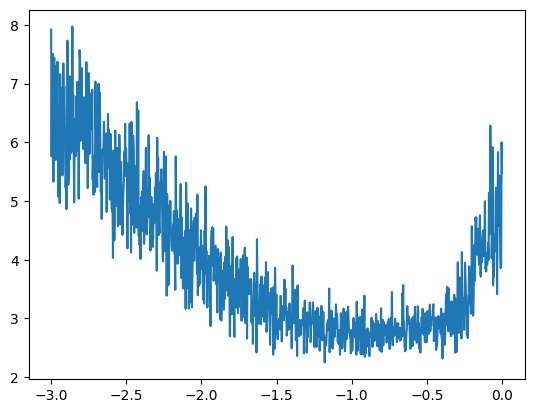

In [136]:
plt.plot(lri,lossi)

In [134]:
emb = C[X] # (32, 3, 2)
h= torch.tanh (emb.view(-1, 6) @ W1 + b1) #(32, 100)
logits= h @ W2+ b2 # (32, 27)
loss =F.cross_entropy (logits, Y)
loss

tensor(6.6142, grad_fn=<NllLossBackward0>)